# Forecasting core construction material costs

## Out line of the problem
- ### Forecast the price of plywood, sheetrock, steel beams, rebar, and glass up to six months into the future, so that the company can decide to buy the commodity early or wait until after the temporary increase.


## Approach

- ### Use the price data for the past 10 years to find a pattern in the cost change. 

- ### Look at the trends and seasonal/cyclic changes using plots and autocorrelation.

- ### Identify monthly changes with plots and Prophet model.

## Summary

- ### For steel beams (strong yearly cycle), don't buy in Nov-Feb. Buy at around 10 (dollars?)

- ### For rebar (strong yearly cycle), don't buy Nov-Jan. Buy at around 10-20 (dollars?)

- ### For concrete (strong yearly cycle) buy in July-Dec(not much data for earlier months). Buy at around 20-30 (dollars?) 

- ### For plywood (small frequent fractuations, short peaks), buy whenever the price is close to 10 (dollars?).

- ### For glass, buy in Nov-Dec when the price fluctuations are lower. Buy whenever the price goes below 25 (dollars?) 

## Relevant analyses

In [1]:
#Import necessary packages

import numpy as np
import pandas as pd
import os

from pandas.plotting import autocorrelation_plot
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sb
color = sb.color_palette()
%matplotlib inline

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

import itertools

from scipy import linalg
from scipy import signal
import matplotlib as mpl

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import periodogram

from fbprophet import Prophet

### Read in the data, check values

In [2]:
#Read the test_results.csv
current_path = os.getcwd()
file = '/datasets/ConstructionMaterialCosts/construction_material_prices_2008_2018.xlsx'
material_prices = pd.read_excel(current_path + file)

In [3]:
#Check null values
material_prices.isnull().sum()

Unnamed: 0           0
price_steel        636
price_rebar       1296
price_glass       1473
price_concrete    1498
price_plywood      272
dtype: int64

### Rename the date column, change the index to make it a time series

In [4]:
material_prices.rename(columns = {'Unnamed: 0': 'year_month_date'}, inplace=True)
#Change the index to make it a time series
material_prices = material_prices.set_index('year_month_date')

### Plot the prices at different times

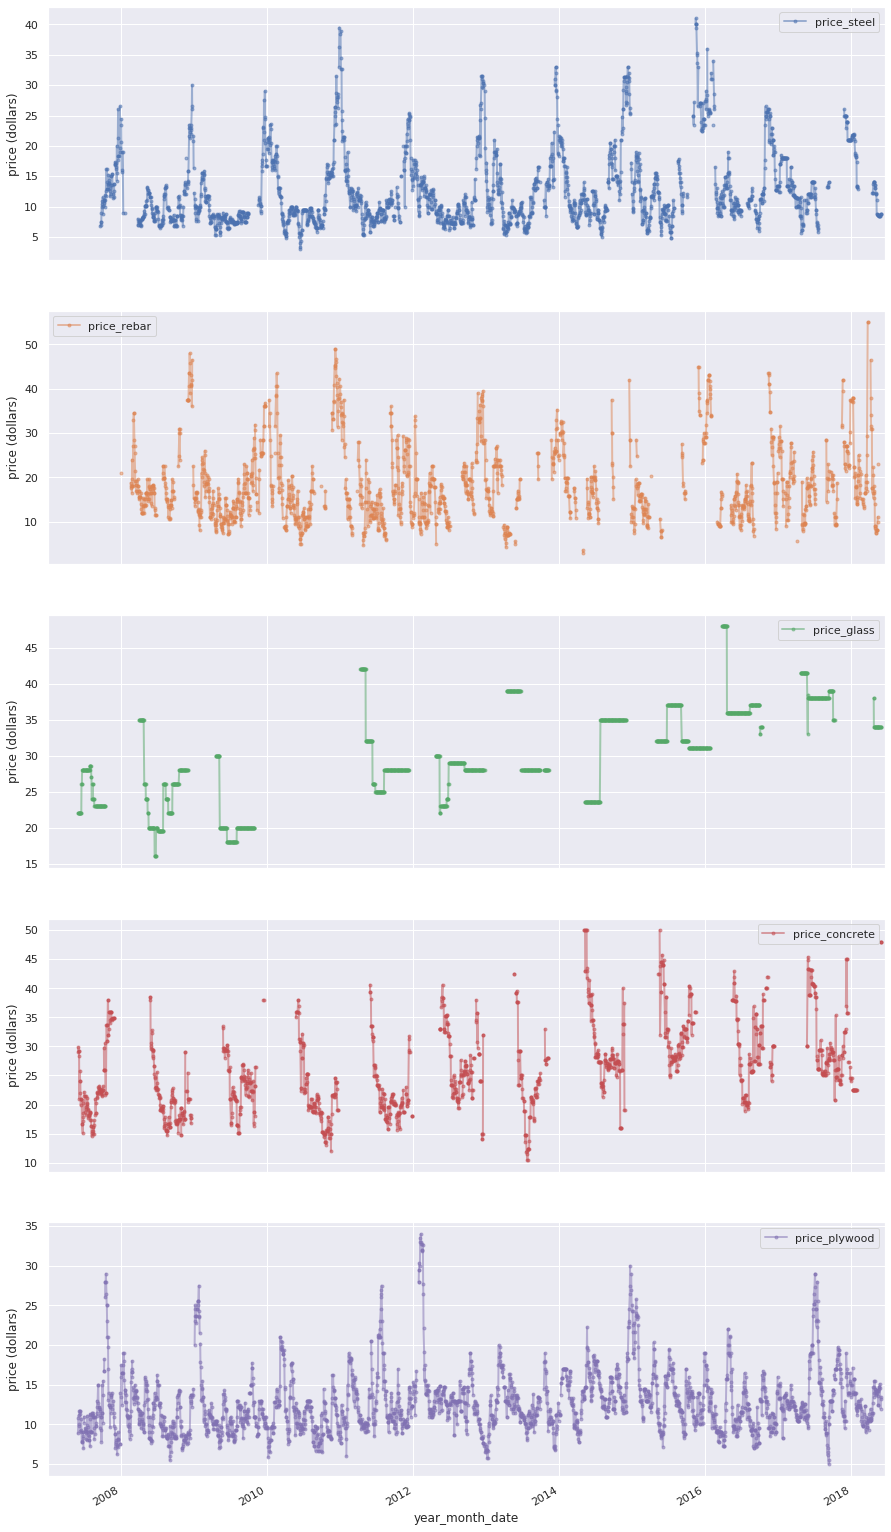

In [5]:
#plot the prices

# Use seaborn style defaults and set the default figure size
sb.set(rc={'figure.figsize':(15, 6)})

cols_plot = ['price_steel', 'price_rebar', 'price_glass', 'price_concrete', 'price_plywood']
axes = material_prices[cols_plot].plot(marker='.', alpha=0.5, linestyle='-', linewidth=2, figsize=(15, 30), subplots=True)
for ax in axes:
    ax.set_ylabel('price (dollars)')


In [6]:
# Add columns with year, month, and weekday name
material_prices['Year'] = material_prices.index.year
material_prices['Month'] = material_prices.index.month
material_prices['Weekday Name'] = material_prices.index.weekday_name

### For autocorrelation and for time series modeling, interpolate the missing values

In [7]:
#Lot of missing values. May be try to interpolate?
material_prices_resample = material_prices.resample('D').mean()
material_prices_resample['price_steel'] = material_prices_resample['price_steel'].interpolate()
material_prices_resample['price_rebar'] = material_prices_resample['price_rebar'].interpolate()
material_prices_resample['price_glass'] = material_prices_resample['price_glass'].interpolate()
material_prices_resample['price_concrete'] = material_prices_resample['price_concrete'].interpolate()
material_prices_resample['price_plywood'] = material_prices_resample['price_plywood'].interpolate()


### price of steel has a strong annual cycle

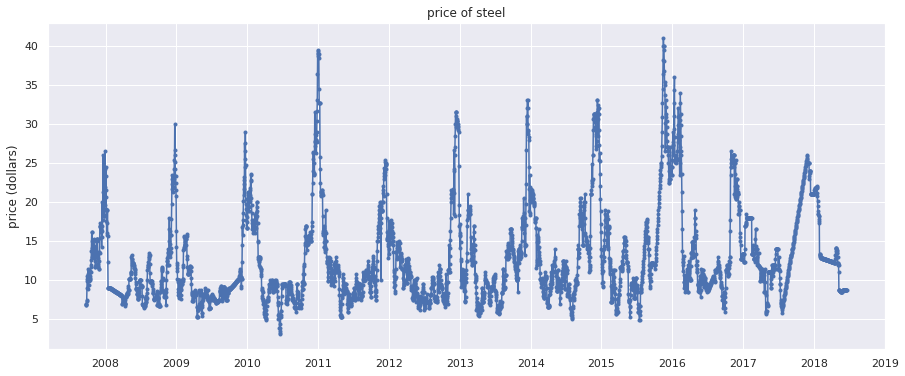

In [8]:
fig = plt.figure(figsize=(15,6))
ax = fig.add_subplot()
#fig, ax = plt.subplots()
#fig.figsize=(8,12)
ax.plot(material_prices_resample.loc['2007-01':'2019-01', 'price_steel'], marker='.', linestyle='-')
ax.set_ylabel('price (dollars)')
ax.set_title('price of steel')
# Set x-axis major ticks to monthly interval, on January
ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth=1))
# Format x-tick labels as 3-letter month name and day number
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'));

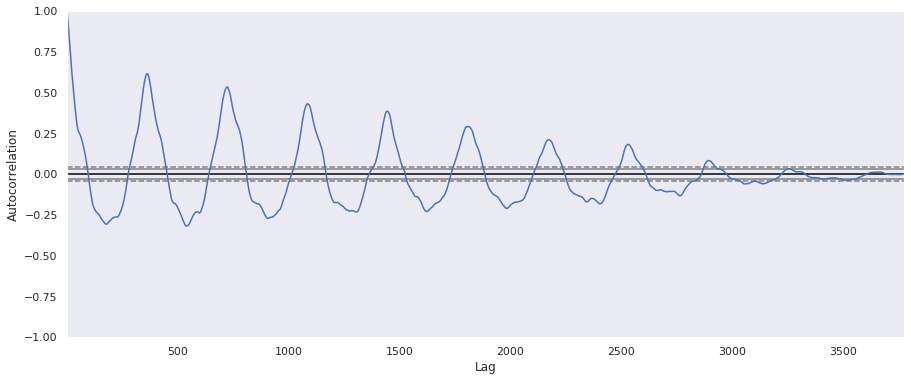

In [9]:
#Check autocorrelation
autocorrelation_plot(material_prices_resample.loc['2007-10':'2018-01', 'price_steel'])

### Rebar price also has strong annual cycle

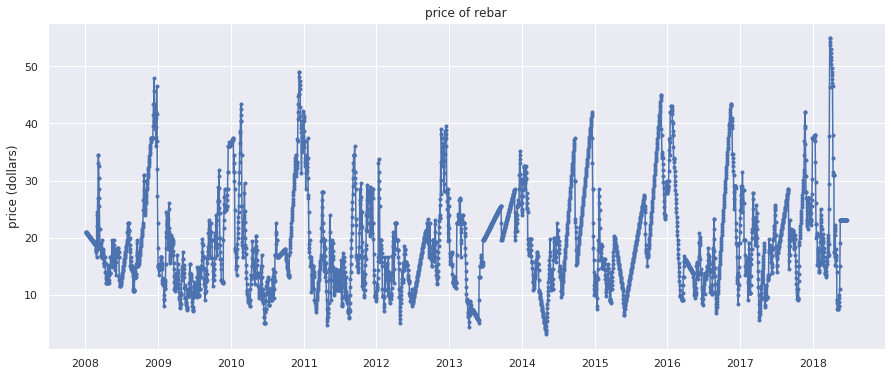

In [10]:
fig = plt.figure(figsize=(15,6))
ax = fig.add_subplot()
#fig, ax = plt.subplots()
#fig.figsize=(8,12)
ax.plot(material_prices_resample.loc['2007-01':'2019-01', 'price_rebar'], marker='.', linestyle='-')
ax.set_ylabel('price (dollars)')
ax.set_title('price of rebar')
# Set x-axis major ticks to monthly interval, on January
ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth=1))
# Format x-tick labels as 3-letter month name and day number
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'));

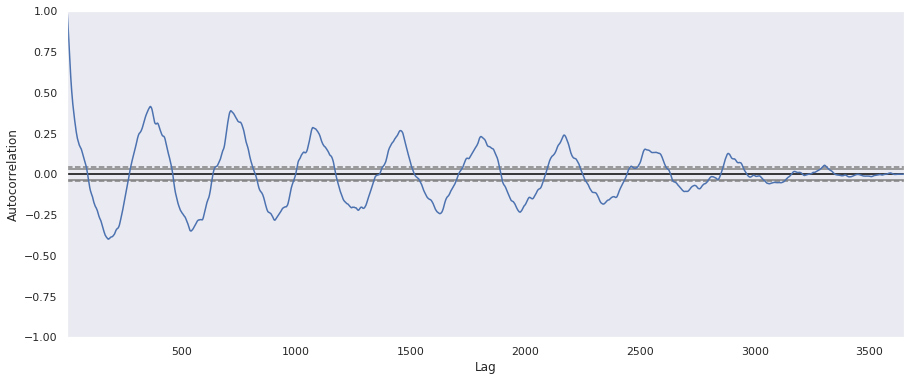

In [11]:
#Check autocorrelation
autocorrelation_plot(material_prices_resample.loc['2008-2':'2018-01', 'price_rebar'])

### Glass price doesn't seem to have a clear pattern? (Lots of missing values)

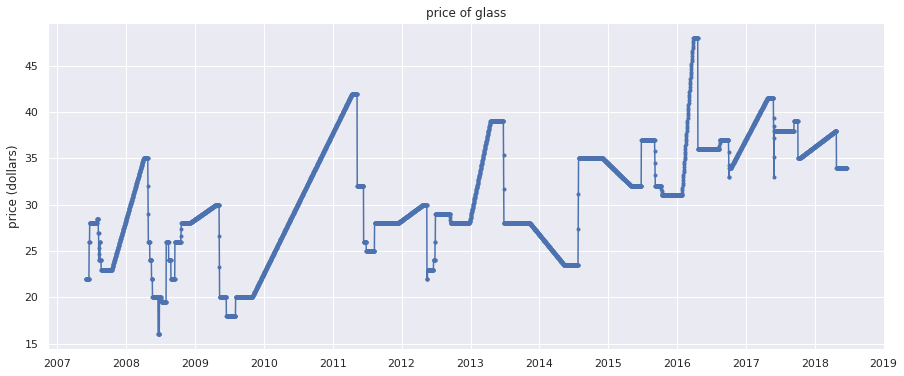

In [12]:
fig = plt.figure(figsize=(15,6))
ax = fig.add_subplot()
#fig, ax = plt.subplots()
#fig.figsize=(8,12)
ax.plot(material_prices_resample.loc['2007-01':'2019-01', 'price_glass'], marker='.', linestyle='-')
ax.set_ylabel('price (dollars)')
ax.set_title('price of glass')
# Set x-axis major ticks to monthly interval, on January
ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth=1))
# Format x-tick labels as 3-letter month name and day number
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'));

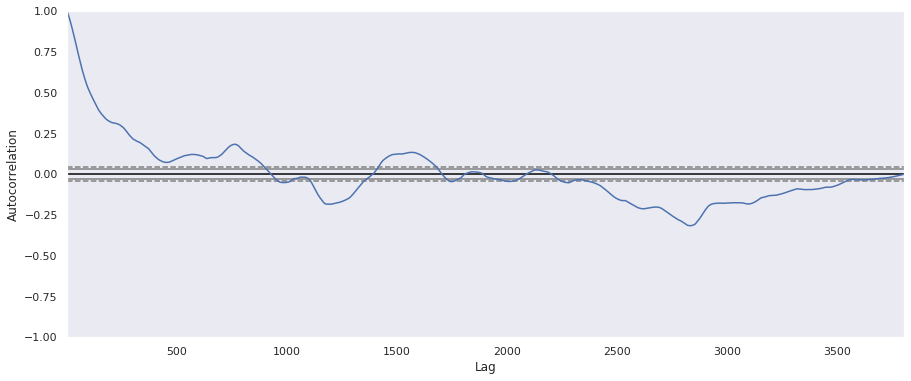

In [13]:
#Check autocorrelation
autocorrelation_plot(material_prices_resample.loc['2007-9':'2018-01', 'price_glass'])

### Concrete price also has strong annual cycle

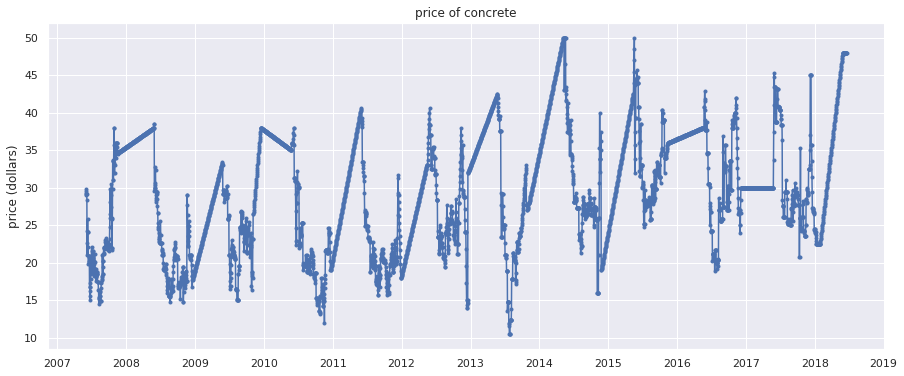

In [14]:
fig = plt.figure(figsize=(15,6))
ax = fig.add_subplot()
#fig, ax = plt.subplots()
#fig.figsize=(8,12)
ax.plot(material_prices_resample.loc['2007-01':'2019-01', 'price_concrete'], marker='.', linestyle='-')
ax.set_ylabel('price (dollars)')
ax.set_title('price of concrete')
# Set x-axis major ticks to monthly interval, on January
ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth=1))
# Format x-tick labels as 3-letter month name and day number
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'));

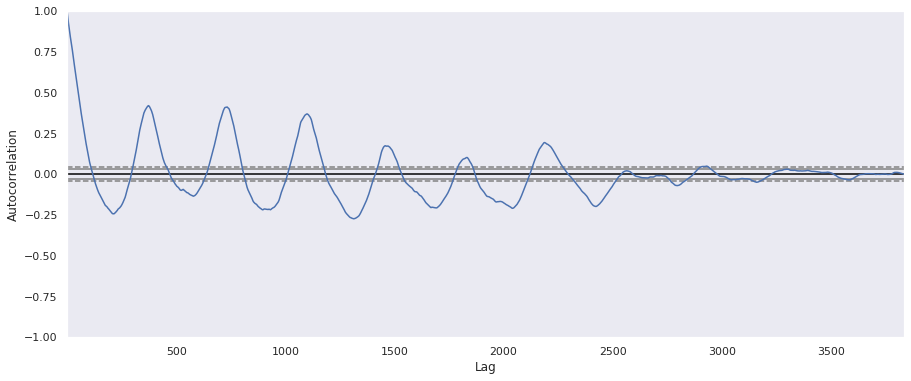

In [15]:
#Check autocorrelation
autocorrelation_plot(material_prices_resample.loc['2007-8':'2018-01', 'price_concrete'])

### Plywood price has short sudden changes

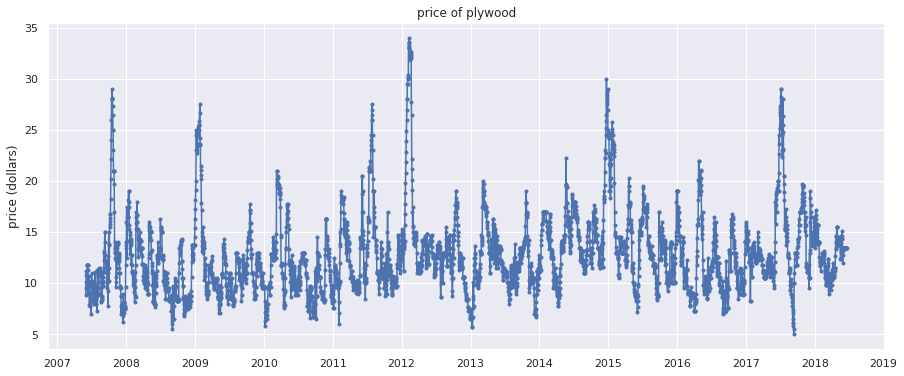

In [16]:
fig = plt.figure(figsize=(15,6))
ax = fig.add_subplot()
#fig, ax = plt.subplots()
#fig.figsize=(8,12)
ax.plot(material_prices_resample.loc['2007-01':'2019-01', 'price_plywood'], marker='.', linestyle='-')
ax.set_ylabel('price (dollars)')
ax.set_title('price of plywood')
# Set x-axis major ticks to monthly interval, on January
ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth=1))
# Format x-tick labels as 3-letter month name and day number
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'));

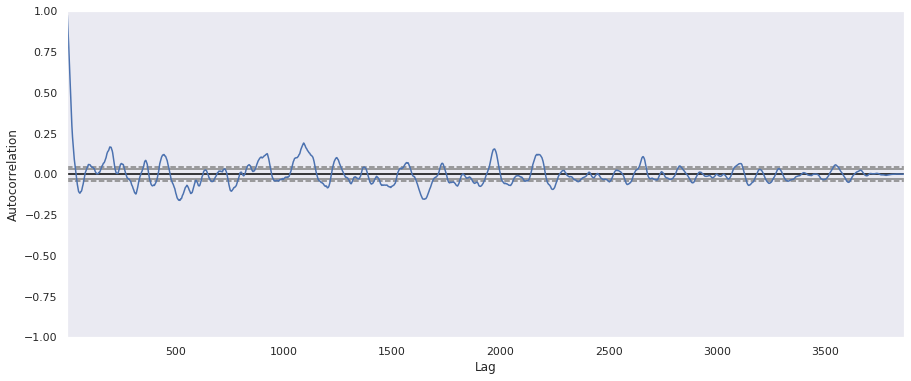

In [17]:
#Check autocorrelation
autocorrelation_plot(material_prices_resample.loc['2007-8':'2018-02', 'price_plywood'])

### Plot the prices for each month using box plot

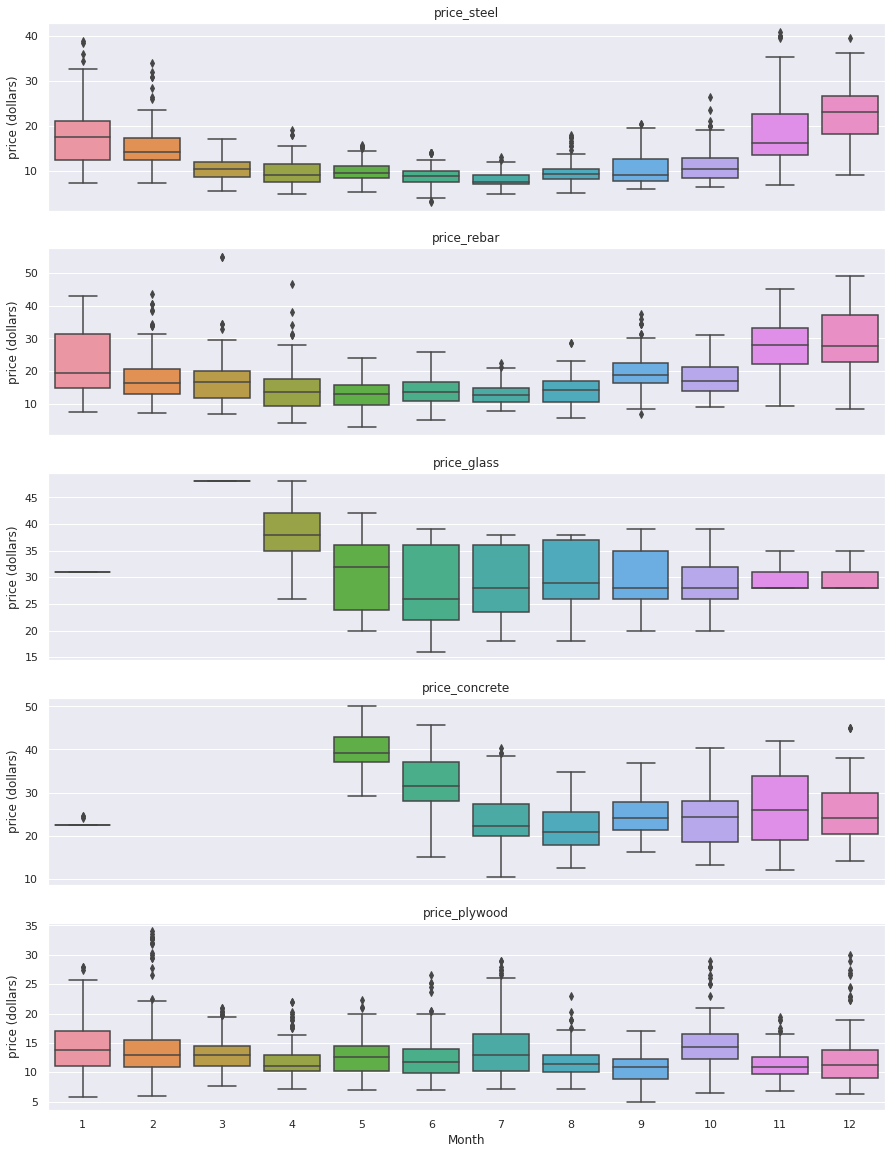

In [18]:
#Plot the prices for each month
fig, axes = plt.subplots(5, 1, figsize=(15, 20), sharex=True)
for name, ax in zip(['price_steel', 'price_rebar', 'price_glass', 'price_concrete','price_plywood'], axes):
    
    sb.boxplot(data=material_prices, x='Month', y=name, ax=ax)
    ax.set_ylabel('price (dollars)')
    ax.set_title(name)
    # Remove the automatic x-axis label from all but the bottom subplot
    if ax != axes[-1]:
        ax.set_xlabel('')

### Use Facebook Prophet model: Check different components

INFO:numexpr.utils:NumExpr defaulting to 4 threads.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


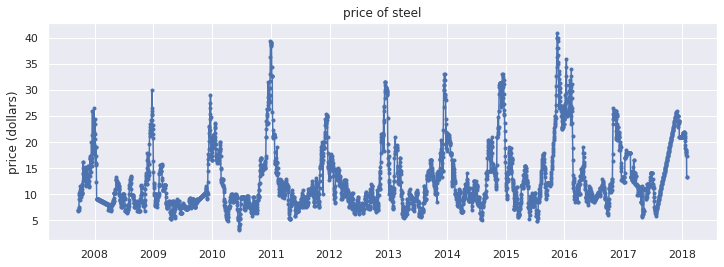

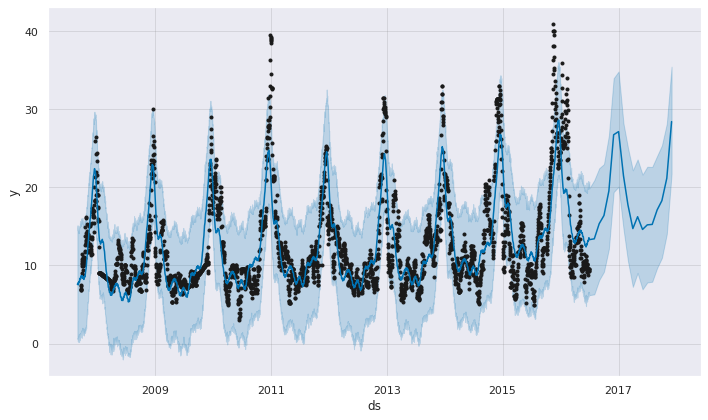

In [19]:
#Use data upto 2016-6 for training.
price_steel_extract=material_prices_resample.loc['2007-09':'2016-06', 'price_steel']
# Reset the index to make the dates an ordinary column
#price_steel_for_prophet.reset_index(inplace=True)
price_steel_data=price_steel_extract.to_frame()
price_steel_data.reset_index(inplace=True)
# Rename the columns for using them in Prophet
price_steel_data.columns = ['ds', 'y']
# Fit model to training data and forecast
model = Prophet(interval_width=0.95)
model.fit(price_steel_data)
future = model.make_future_dataframe(periods=18, freq='MS')
forecast = model.predict(future)

# Plot the model and forecast
fig = plt.figure(figsize=(12,4))
ax = fig.add_subplot()
#fig, ax = plt.subplots()
#fig.figsize=(8,12)
ax.plot(material_prices_resample.loc['2007-01':'2018-01', 'price_steel'], marker='.', linestyle='-')
model.plot(forecast, uncertainty=True)
ax.set_ylabel('price (dollars)')
ax.set_title('price of steel')
# Set x-axis major ticks to monthly interval, on January
ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth=1))
# Format x-tick labels as 3-letter month name and day number
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'));

### Show the components of the forecasting model

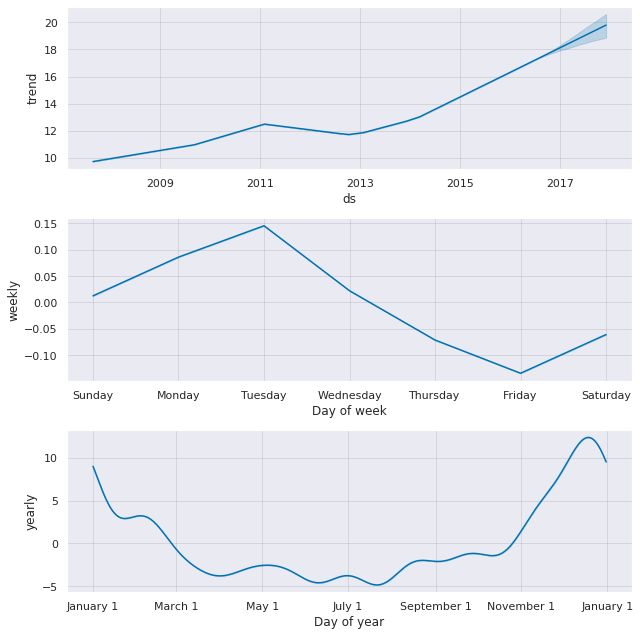

In [20]:
model.plot_components(forecast);

## Results

- ### For steel beams (strong yearly cycle), don't buy in Nov-Feb. Buy at around 10 (dollars?)

- ### For rebar (strong yearly cycle), don't buy Nov-Jan. Buy at around 10-20 (dollars?)

- ### For concrete (strong yearly cycle) buy in July-Dec(not much data for earlier months). Buy at around 20-30 (dollars?) 

- ### For plywood (small frequent fractuations, short peaks), buy whenever the price is close to 10 (dollars?).

- ### For glass, buy in Nov-Dec when the price fluctuations are lower. Buy whenever the price goes below 25 (dollars?)

## Future analysis

- ### Analyze possible relationships between the prices of different materials

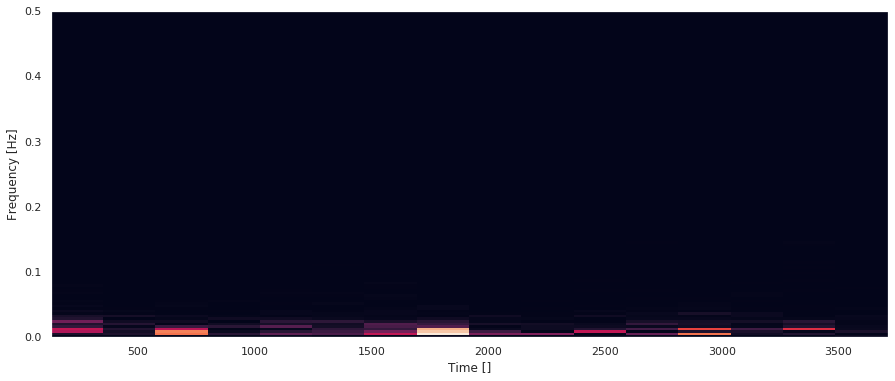

In [27]:
f, t, Sxx = signal.spectrogram(material_prices_resample.loc['2007-8':'2018-02', 'price_plywood'])
plt.pcolormesh(t, f, Sxx)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time []')
plt.show()